# Trade Over the COVID Cliff
Let's see how well the algorithm can adapt as the market crashes.

#### Import necessary modules

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import boto3
from IPython.display import Image
import math
import numpy as np
import pandas as pd
from sagemaker import get_execution_role
from sagemaker.estimator import Estimator
from sagemaker.session import Session
import seaborn as sns; sns.set()
import shutil
from time import sleep

#### Set for local parameters

In [5]:
n_instances = 1
#image_type = 'cpu'
#instance_type = 'ml.m5.large'

image_type = 'gpu'
instance_type = 'ml.g4dn.xlarge'

hyperparameters = {'prices_name': 'prices-2020-June.csv',
                   'signals_name': 'signals-2020-June.csv',
                   'start_day': 2901,
                   'days_per_epoch': 40,
                   'fc1': 16,
                   'fc2': 0,
                   'lr_actor': 0.00092,
                   'lr_critic': 0.00431}

train_use_spot_instances = True
train_max_run = 14400
train_max_wait = 14400 if train_use_spot_instances else None

sagemaker_session = Session()
bucket_name = sagemaker_session.default_bucket()
role = get_execution_role()
account = boto3.client('sts').get_caller_identity()['Account']
region = boto3.Session().region_name
image_name = '{}.dkr.ecr.{}.amazonaws.com/portfolio-optimization-{}:latest'.format(account, region, image_type)

#### Submit the job

In [6]:
estimator = Estimator(role=role,
                      train_instance_count=n_instances,
                      train_instance_type=instance_type,
                      image_name=image_name,
                      train_use_spot_instances=train_use_spot_instances,
                      train_max_run=train_max_run,
                      train_max_wait=train_max_wait,
                      hyperparameters=hyperparameters)
estimator.fit()


Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


2020-07-29 20:04:26 Starting - Starting the training job...
2020-07-29 20:04:28 Starting - Launching requested ML instances.........
2020-07-29 20:06:18 Starting - Preparing the instances for training......
2020-07-29 20:07:13 Downloading - Downloading input data
2020-07-29 20:07:13 Training - Downloading the training image.........
2020-07-29 20:08:44 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-07-29 20:08:45,012 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-07-29 20:08:45,013 sagemaker-containers INFO     Failed to parse hyperparameter signals_name value signals-2020-June.csv to Json.
Returning the value itself
2020-07-29 20:08:45,013 sagemaker-containers INFO     Failed to parse hyperparameter prices_name value prices-2020-June.csv to Json.
Returning the value itself
2020-07-29 20:08:45,033 sagemaker_

#### Get the results

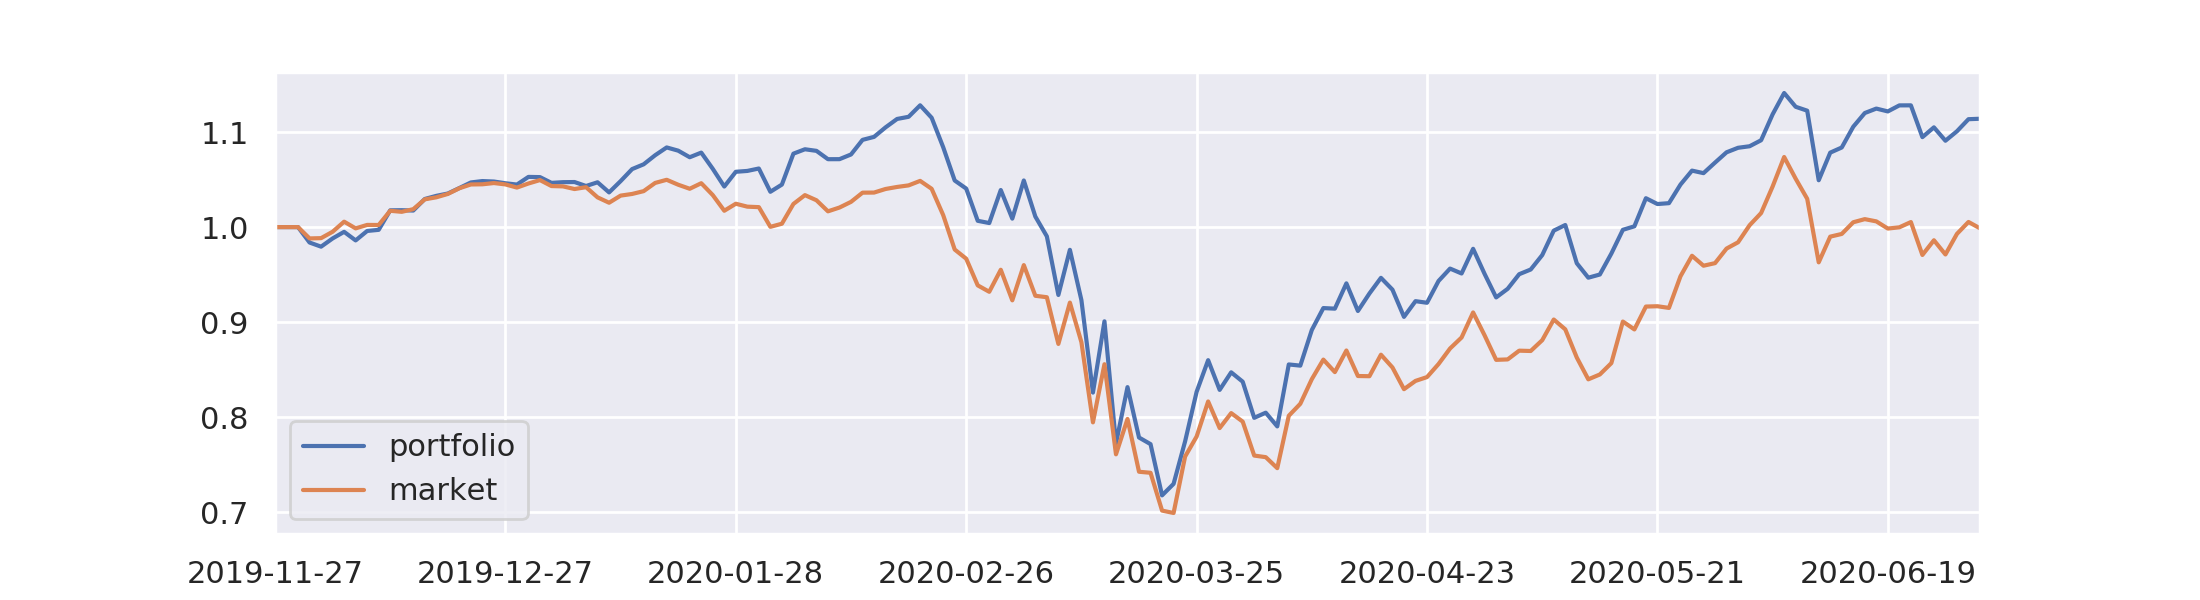

In [7]:
s3 = boto3.resource('s3')
key = '{}/output/output.tar.gz'.format(estimator._current_job_name)
s3.Bucket(bucket_name).download_file(key, 'output.tar.gz')
shutil.unpack_archive('output.tar.gz')
Image(filename='history.png') 

# Reference
- [Tennis Sensitivity](https://github.com/daniel-fudge/sagemaker-tennis/blob/master/sensitivity.ipynb)
- [Tennis Repo](https://github.com/daniel-fudge/sagemaker-tennis)
#### SageMaker
- [SageMaker Instance types](https://aws.amazon.com/sagemaker/pricing/instance-types/)
- [SageMaker Instance prices](https://aws.amazon.com/sagemaker/pricing/)
- [SageMaker Estimator SDK](https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html)